Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("D:\Data Science\Main Course\Deep Learning\CNN\CNN Case Study\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path('D:\Data Science\Main Course\Deep Learning\CNN\CNN Case Study\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, validation_split= 0.2, subset='training', seed= 123,image_size=(img_height,img_width), batch_size= batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test, validation_split=0.2, subset='training', seed= 123,image_size=(img_height,img_width), batch_size= batch_size)

Found 118 files belonging to 9 classes.
Using 95 files for training.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

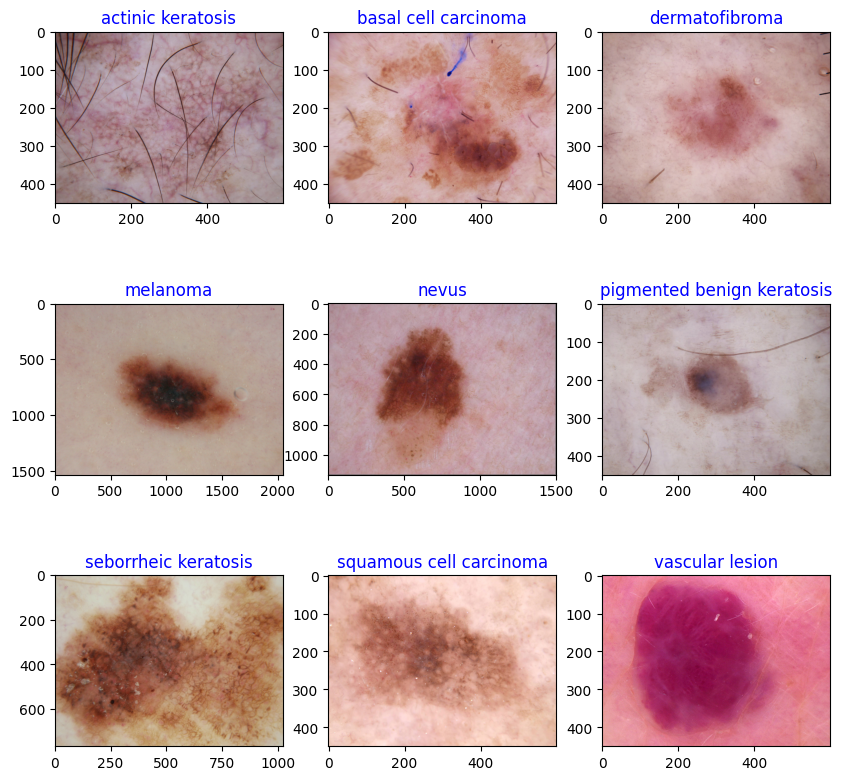

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualizeimport matplotlib.image as mpimg
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, 1+i)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i], color= 'blue')
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten , BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D 

In [14]:
### Your code goes here
input_shape = (180,180,3)

model = Sequential()

#Adding layers
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), padding= 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), padding= 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), padding= 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding= 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(len(class_names)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 180, 180, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 178, 178, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 178, 178, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 178, 178, 32)      1

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 180, 180, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 178, 178, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 178, 178, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 178, 178, 32)      1

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 29s 282ms/step - loss: 2.2190 - accuracy: 0.2695 - val_loss: 2.6544 - val_accuracy: 0.0211
Epoch 2/20
56/56 [==============================] - 13s 235ms/step - loss: 1.8477 - accuracy: 0.3555 - val_loss: 2.1338 - val_accuracy: 0.1579
Epoch 3/20
56/56 [==============================] - 13s 235ms/step - loss: 1.6977 - accuracy: 0.3873 - val_loss: 2.1059 - val_accuracy: 0.1474
Epoch 4/20
56/56 [==============================] - 13s 238ms/step - loss: 1.6039 - accuracy: 0.4291 - val_loss: 2.2320 - val_accuracy: 0.1474
Epoch 5/20
56/56 [==============================] - 14s 241ms/step - loss: 1.5826 - accuracy: 0.4420 - val_loss: 2.5185 - val_accuracy: 0.1474
Epoch 6/20
56/56 [==============================] - 13s 240ms/step - loss: 1.5462 - accuracy: 0.4414 - val_loss: 2.4494 - val_accuracy: 0.0737
Epoch 7/20
56/56 [==============================] - 13s 239ms/step - loss: 1.5131 - accuracy: 0.4598 - val_loss: 2.2954 - val_accuracy: 0.1579

### Visualizing training results

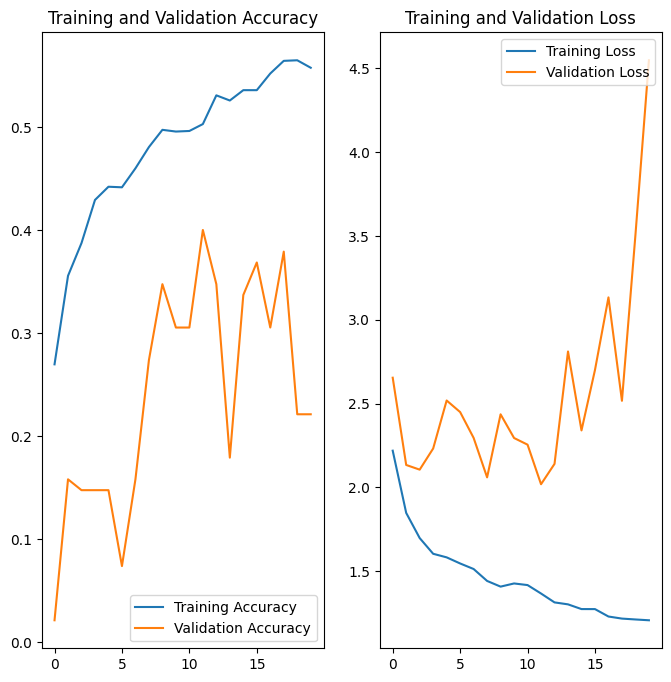

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
accuracy_train = model.evaluate(train_ds)
accuracy_val = model.evaluate(val_ds)
print('Training accuracy = ',accuracy_train[1])
print('Validation accuracy = ',accuracy_val[1])
#As we can see above there is huge amount of gap present between the training accuracy and validation accuracy, so model is overfit as permissible gap between tran-validation accuracy is of 5%

3/3 [==============================] - 0s 55ms/step - loss: 4.5482 - accuracy: 0.2211
Training accuracy =  0.3225446343421936
Validation accuracy =  0.2210526317358017


In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
#Adding dropout layer after all layers
## Your code goes here

data_augmentation.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
data_augmentation.add(Conv2D(32,(3,3),padding='same'))
data_augmentation.add(Activation('relu'))
data_augmentation.add(BatchNormalization())
data_augmentation.add(Conv2D(32,(3,3)))
data_augmentation.add(Activation('relu'))
data_augmentation.add(BatchNormalization())
data_augmentation.add(MaxPool2D(pool_size=(2,2)))
data_augmentation.add(Dropout(0.2))

data_augmentation.add(Conv2D(64,(3,3),padding='same'))
data_augmentation.add(Activation('relu'))
data_augmentation.add(BatchNormalization())
data_augmentation.add(Conv2D(64,(3,3)))
data_augmentation.add(Activation('relu'))
data_augmentation.add(BatchNormalization())
data_augmentation.add(MaxPool2D(pool_size=(2,2)))
data_augmentation.add(Dropout(0.2))

data_augmentation.add(Conv2D(128,(3,3),padding='same'))
data_augmentation.add(Activation('relu'))
data_augmentation.add(BatchNormalization())
data_augmentation.add(Conv2D(128,(3,3)))
data_augmentation.add(Activation('relu'))
data_augmentation.add(BatchNormalization())
data_augmentation.add(MaxPool2D(pool_size=(2,2)))
data_augmentation.add(Dropout(0.2))

data_augmentation.add(Conv2D(256,(3,3),padding='same'))
data_augmentation.add(Activation('relu'))
data_augmentation.add(BatchNormalization())
data_augmentation.add(Conv2D(256,(3,3)))
data_augmentation.add(Activation('relu'))
data_augmentation.add(BatchNormalization())
data_augmentation.add(MaxPool2D(pool_size=(2,2)))
data_augmentation.add(Dropout(0.2))

data_augmentation.add(Conv2D(512,(3,3),padding='same'))
data_augmentation.add(Activation('relu'))
data_augmentation.add(BatchNormalization())
data_augmentation.add(Conv2D(512,(3,3)))
data_augmentation.add(Activation('relu'))
data_augmentation.add(BatchNormalization())
data_augmentation.add(MaxPool2D(pool_size=(2,2)))
data_augmentation.add(Dropout(0.2))

data_augmentation.add(Flatten())
data_augmentation.add(Dense(128))
data_augmentation.add(Activation('relu'))
data_augmentation.add(Dropout(0.25))

data_augmentation.add(Dense(256))
data_augmentation.add(Activation('relu'))
data_augmentation.add(Dropout(0.25))

data_augmentation.add(Dense(512))
data_augmentation.add(Activation('relu'))
data_augmentation.add(Dropout(0.25))

data_augmentation.add(Dense(len(class_names)))
data_augmentation.add(Activation('softmax'))
data_augmentation.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip (RandomFlip)     (None, 180, 180, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 180, 180, 3)       0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
activation_14 (Activation)   (None, 180, 180, 32)      0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 180, 180, 32)     

### Compiling the model

In [22]:
## Your code goes here
data_augmentation.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
history = epochs = 20
history = data_augmentation.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 17s 258ms/step - loss: 2.0517 - accuracy: 0.3013 - val_loss: 2.2671 - val_accuracy: 0.1368
Epoch 2/20
56/56 [==============================] - 14s 253ms/step - loss: 1.8616 - accuracy: 0.3555 - val_loss: 2.3356 - val_accuracy: 0.0316
Epoch 3/20
56/56 [==============================] - 14s 253ms/step - loss: 1.7302 - accuracy: 0.3756 - val_loss: 2.1979 - val_accuracy: 0.1684
Epoch 4/20
56/56 [==============================] - 14s 254ms/step - loss: 1.6265 - accuracy: 0.4224 - val_loss: 2.8364 - val_accuracy: 0.1684
Epoch 5/20
56/56 [==============================] - 14s 254ms/step - loss: 1.5883 - accuracy: 0.4381 - val_loss: 2.6049 - val_accuracy: 0.1474
Epoch 6/20
56/56 [==============================] - 14s 254ms/step - loss: 1.5249 - accuracy: 0.4621 - val_loss: 2.2158 - val_accuracy: 0.2105
Epoch 7/20
56/56 [==============================] - 14s 254ms/step - loss: 1.5414 - accuracy: 0.4436 - val_loss: 2.6200 - val_accuracy: 0.1684

### Visualizing the results

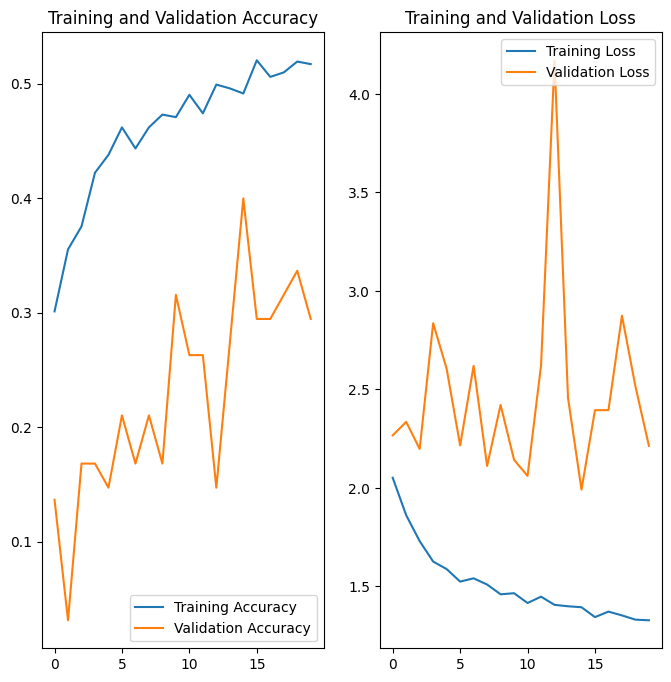

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
#Checking Accuracy
accuracy_train = data_augmentation.evaluate(train_ds)
accuracy_val = data_augmentation.evaluate(val_ds)
print('Training accuracy = ',accuracy_train[1])
print('Validation accuracy = ',accuracy_val[1])
#for model 2 it looks like still model is overfitted

3/3 [==============================] - 0s 54ms/step - loss: 2.2141 - accuracy: 0.2947
Training accuracy =  0.4017857015132904
Validation accuracy =  0.2947368323802948


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

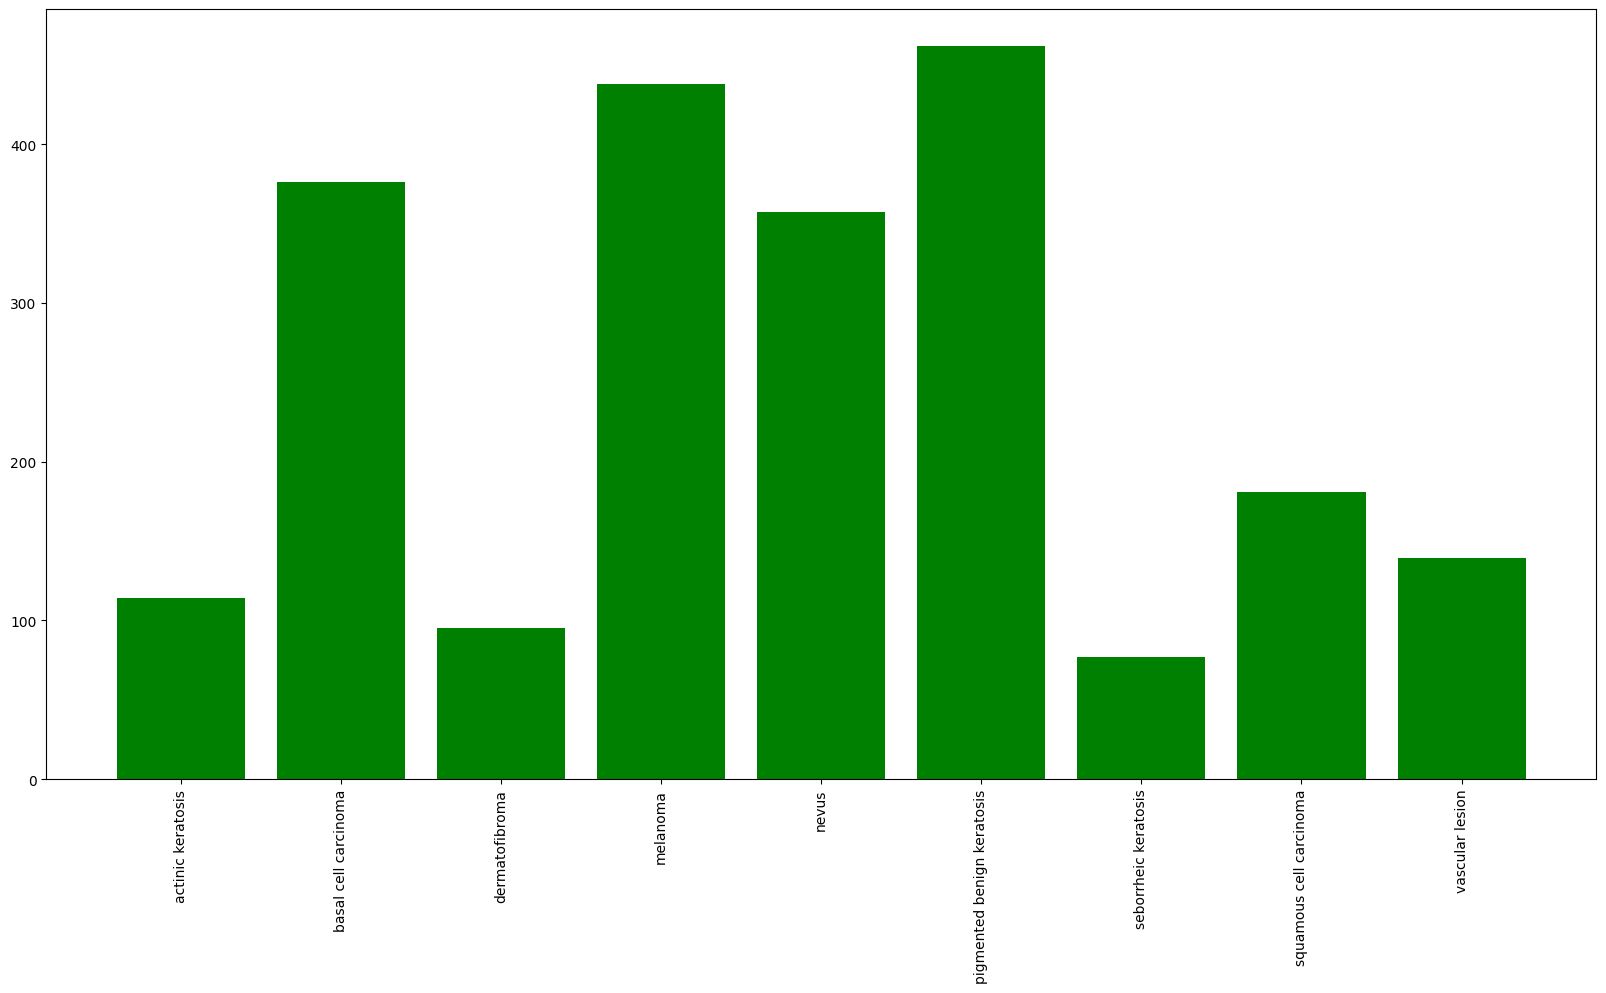

In [26]:
## Your code goes here.
dict_no={}
for i in range(0,len(class_names)):
    dict_no[class_names[i]]= (len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

#Plotting all classes
plt.figure(figsize=(20,10))
plt.bar(dict_no.keys(), dict_no.values(), color= 'green')
plt.xticks(rotation=90)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
Seborrheic keratosis has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
Basal cell carcinoma, melanoma and pigmented benign keratosis has proportionate number of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [28]:
path_to_training_dataset="D:\\Data Science\\Main Course\\Deep Learning\\CNN\\CNN Case Study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\CNN Case Study\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E2E7AE3FA0>: 100%|██████████| 500/500 [00:03<00:00, 161.93 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\CNN Case Study\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1E2EB87F3D0>: 100%|██████████| 500/500 [00:02<00:00, 175.91 Samples/s]


Initialised with 95 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\CNN Case Study\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E2EB874880>: 100%|██████████| 500/500 [00:03<00:00, 129.65 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\CNN Case Study\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x1E2E746D580>: 100%|██████████| 500/500 [00:13<00:00, 37.02 Samples/s]                  


Initialised with 357 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\CNN Case Study\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=3008x2000 at 0x1E2E0CC8A60>: 100%|██████████| 500/500 [00:14<00:00, 33.38 Samples/s]                  


Initialised with 462 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\CNN Case Study\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1E2EB8A5820>: 100%|██████████| 500/500 [00:03<00:00, 165.84 Samples/s]


Initialised with 77 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\CNN Case Study\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1E2EB860D60>: 100%|██████████| 500/500 [00:08<00:00, 58.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\CNN Case Study\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E2E0CA9100>: 100%|██████████| 500/500 [00:03<00:00, 160.84 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\CNN Case Study\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1E2DD27CA00>: 100%|██████████| 500/500 [00:03<00:00, 153.41 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [29]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [30]:
from glob import glob


path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['D:\\Data Science\\Main Course\\Deep Learning\\CNN\\CNN Case Study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_01a92967-5be2-451c-8071-46a9f7abd138.jpg',
 'D:\\Data Science\\Main Course\\Deep Learning\\CNN\\CNN Case Study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_474c1a03-fffb-4830-9364-067dd1fe0418.jpg',
 'D:\\Data Science\\Main Course\\Deep Learning\\CNN\\CNN Case Study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6fd69daf-5840-45eb-866e-ce8238c6e708.jpg',
 'D:\\Data Science\\Main Course\\Deep Learning\\CNN\\CNN Case Study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_8d651a46-ccb7-4a08-a9ed-9fef8d5

In [31]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [32]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [33]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df =(df2)

In [34]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [35]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [36]:
data_dir_train="D:\\Data Science\\Main Course\\Deep Learning\\CNN\\CNN Case Study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [45]:
## your code goes here
model3 = Sequential()

model3.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model3.add(Conv2D(32,(3,3),padding='same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(32,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64,(3,3),padding='same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(64,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.2))


model3.add(Conv2D(128,(3,3),padding='same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(128,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(256,(3,3),padding='same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(256,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.25))

model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dropout(0.25))

model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.25))

model3.add(Dense(len(class_names)))
model3.add(Activation('softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
activation_38 (Activation)   (None, 180, 180, 32)      0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 180, 180, 32)      128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 178, 178, 32)      9248      
_________________________________________________________________
activation_39 (Activation)   (None, 178, 178, 32)      0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 178, 178, 32)     

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [46]:
## your code goes here
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [47]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 44s 252ms/step - loss: 2.2604 - accuracy: 0.2506 - val_loss: 3.0717 - val_accuracy: 0.1151
Epoch 2/30
169/169 [==============================] - 42s 248ms/step - loss: 1.8184 - accuracy: 0.3236 - val_loss: 2.2662 - val_accuracy: 0.1982
Epoch 3/30
169/169 [==============================] - 42s 250ms/step - loss: 1.6848 - accuracy: 0.3698 - val_loss: 1.9246 - val_accuracy: 0.3044
Epoch 4/30
169/169 [==============================] - 42s 249ms/step - loss: 1.5383 - accuracy: 0.4045 - val_loss: 1.5849 - val_accuracy: 0.3920
Epoch 5/30
169/169 [==============================] - 42s 249ms/step - loss: 1.4769 - accuracy: 0.4323 - val_loss: 1.5835 - val_accuracy: 0.4336
Epoch 6/30
169/169 [==============================] - 43s 251ms/step - loss: 1.4136 - accuracy: 0.4557 - val_loss: 1.7376 - val_accuracy: 0.3942
Epoch 7/30
169/169 [==============================] - 43s 251ms/step - loss: 1.3315 - accuracy: 0.4896 - val_loss: 1.6739 - val_ac

#### **Todo:**  Visualize the model results

In [1]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [51]:
#Checking for accuracy
accuracy_train = model3.evaluate(train_ds)
accuracy_val = model3.evaluate(val_ds)
print('Training accuracy = ',accuracy_train[1])
print('Validation accuracy = ',accuracy_val[1])

43/43 [==============================] - 3s 61ms/step - loss: 0.5609 - accuracy: 0.8144
Training accuracy =  0.9107937812805176
Validation accuracy =  0.8144024014472961


In [48]:
#CLass rebalance done good job but still some overfitting is there 
#Overall model accuracy is good

In [52]:
model3.save('skin cancer')

INFO:tensorflow:Assets written to: skin cancer\assets
